# Run U: 7 Jet IC at 5 Jet parameters

Want to look at 2nd cumulant as it goes through transition.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
plt.style.use('modern')

In [3]:
#df = h5py.File("scratch/busse_annulus_ra4.00e+07_beta3.16e+05_C3.16e-01_Pr1.00e+00_filter5.00e-01_nx256_ny64_CFL_Jetbias_m6_a15.9155/snapshots/snapshots_s1.h5","r")
df = h5py.File("scratch/busse_annulus_ra4.00e+07_beta3.16e+05_C3.16e-01_Pr1.00e+00_filter5.00e-01_nx512_ny128_CFL_Jetbias_m6_a15.9155/snapshots/snapshots_s1.h5","r")

<IPython.core.display.Javascript object>


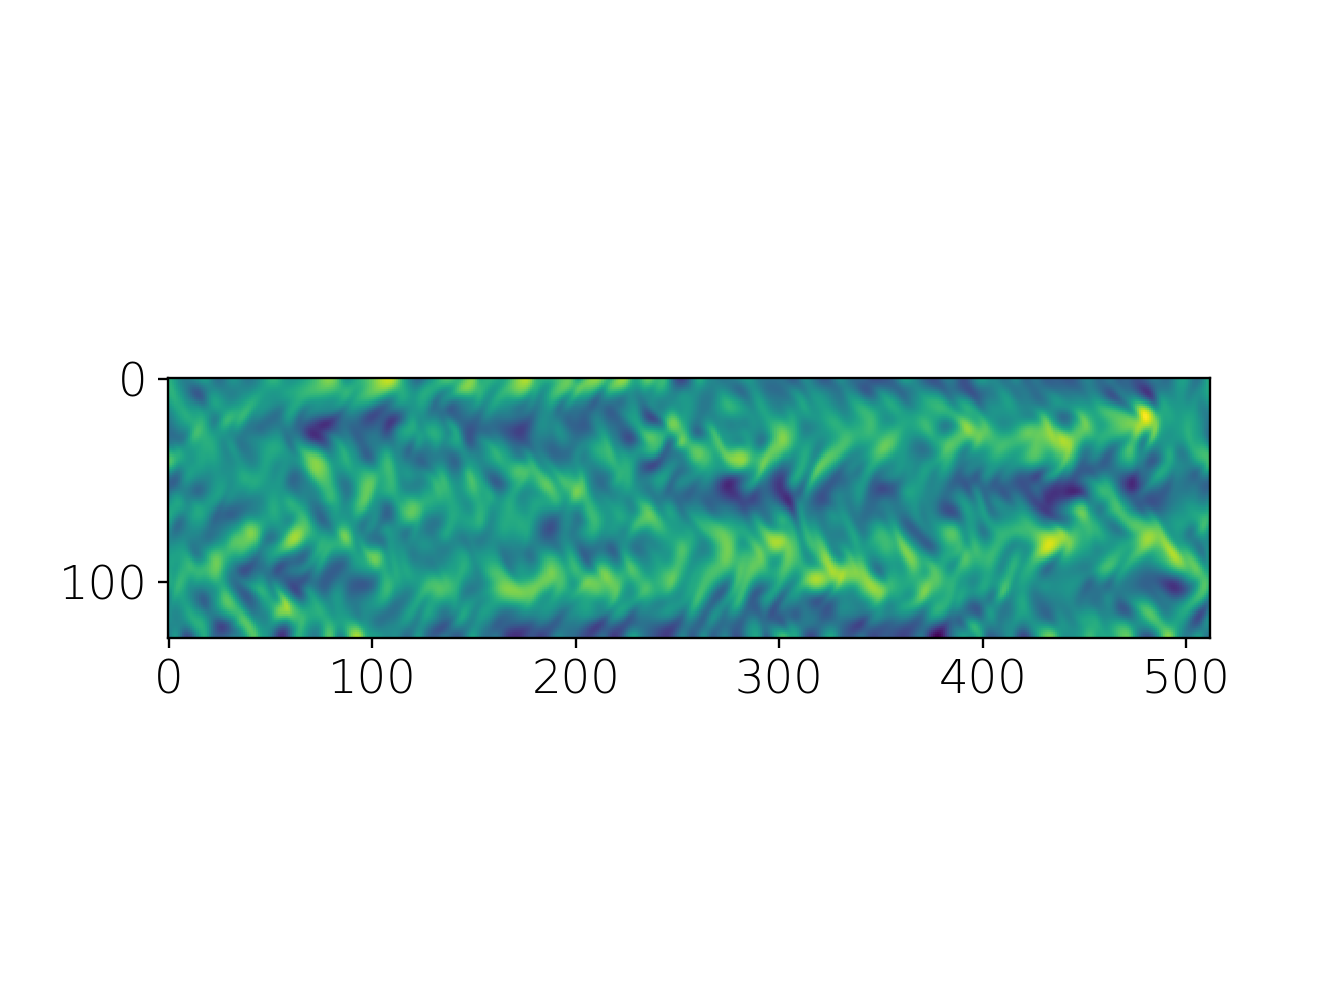

In [14]:
plt.figure()
plt.imshow(df['tasks/u_x'][100],interpolation=None)

In [5]:
df['tasks/psi'].shape

(500, 128, 512)

## Hovmoller plot

Make low-accuracy average using numpy for now.

In [6]:
psi_xavg = df['tasks/psi'][:,:,:].mean(axis=-1)
ux_xavg = df['tasks/u_x'][:,:,:].mean(axis=-1)

In [7]:
300/(6*np.pi)

15.915494309189533

<IPython.core.display.Javascript object>


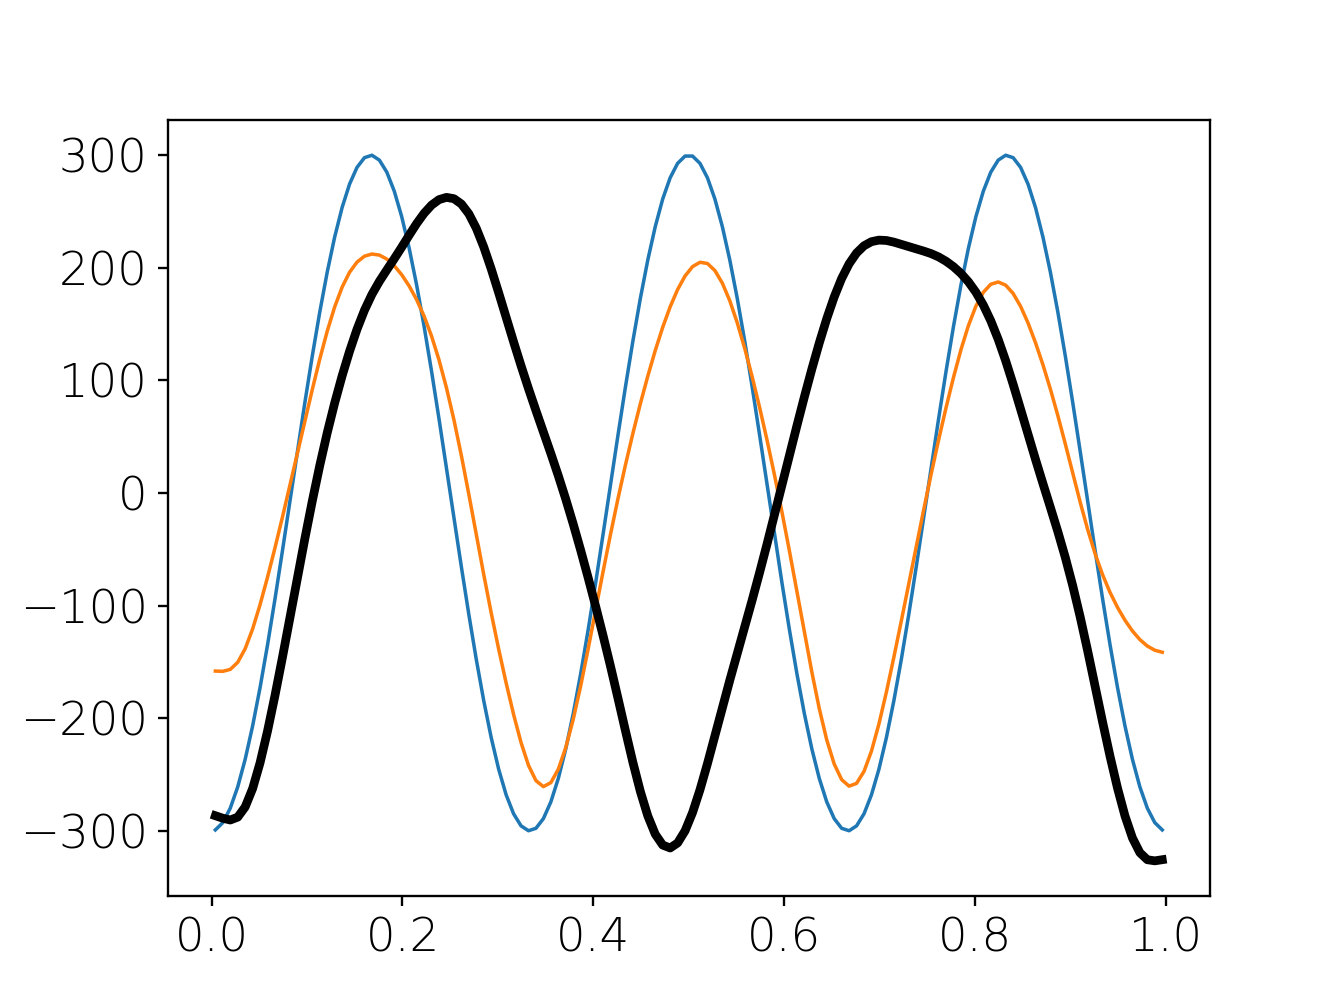

In [18]:
plt.figure()
plt.plot(df['scales/y/1.0'],ux_xavg[0,:])
plt.plot(df['scales/y/1.0'],ux_xavg[6,:])

plt.plot(df['scales/y/1.0'],ux_xavg[-1,:], linewidth=3, color='k')

<IPython.core.display.Javascript object>


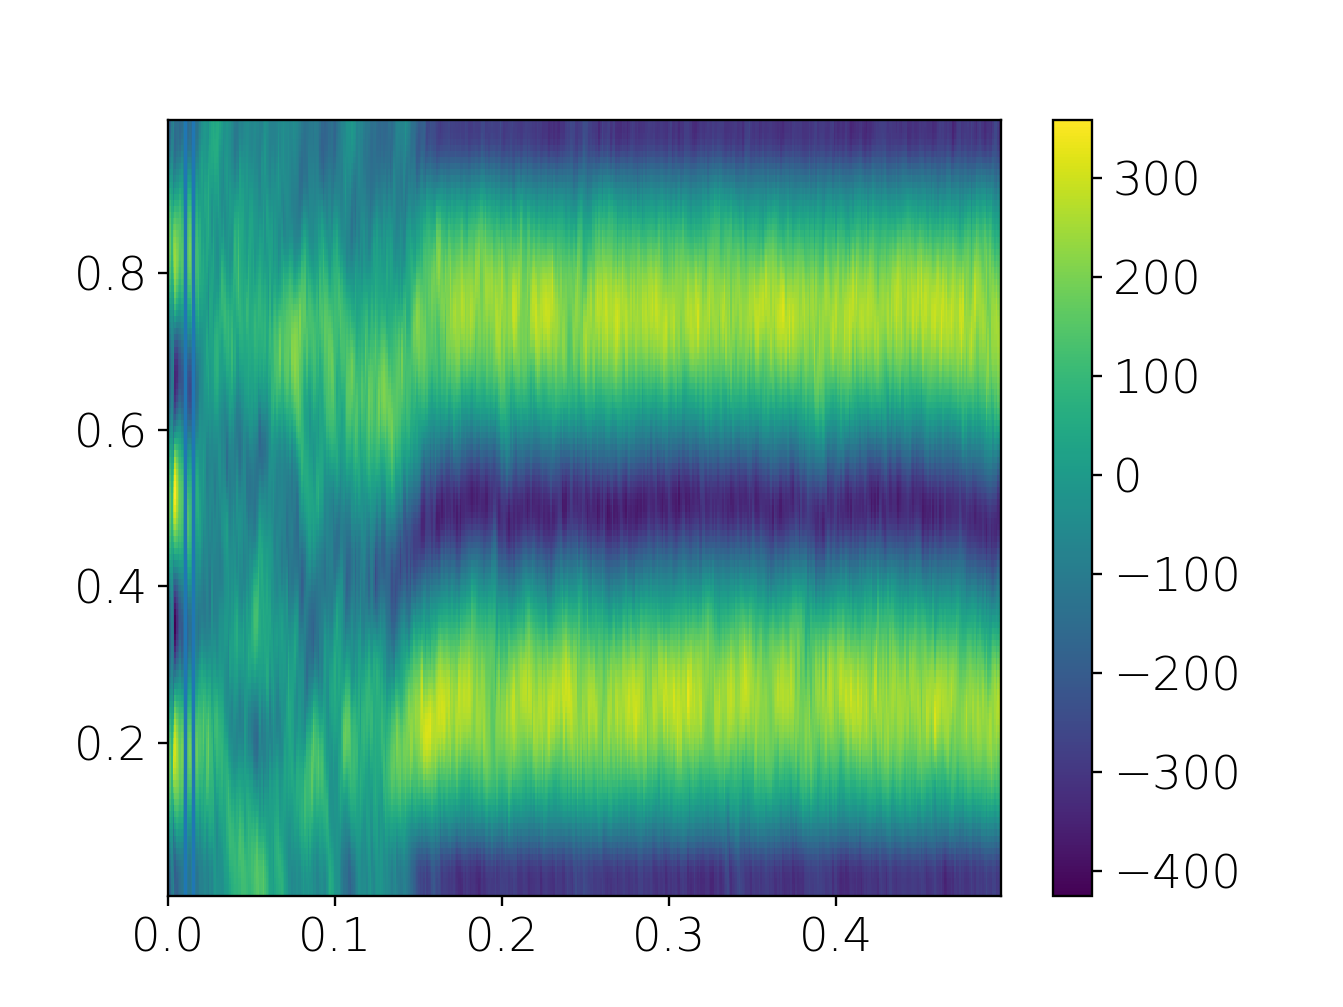

In [9]:
plt.figure()

plt.pcolormesh(df['scales/sim_time'], df['scales/y/1.0'],ux_xavg.T)
plt.axvline(0.01)
plt.axvline(0.015)
#plt.xlim(0,0.03)
plt.colorbar()

In [10]:
df['scales/sim_time'][5]

0.0050009405149021415

In [11]:
def plot_multi_hist(axes, data, times, labels):
    
    axins_l = axes.inset_axes([0.1, 0.5, 0.2, 0.3])
    axins_r = axes.inset_axes([0.7, 0.5, 0.2, 0.3])

    for t,l in zip(times, labels):
        axes.hist(data[t].ravel(), alpha=0.5, label=l,bins=nbins)
        axins_l.hist(data[t].ravel(), alpha=0.5, label=l,bins=nbins)
        axins_r.hist(data[t].ravel(), alpha=0.5, label=l,bins=nbins)
    axes.set_xlim(-60,60)
    axes.set_ylim(0,1300)
    axins_l.set_xlim(-60,-30)
    axins_l.set_ylim(0,300)
    axins_r.set_xlim(30,60)
    axins_r.set_ylim(0,300)
    plt.legend()
    axes.set_xlabel(r"$\psi$")
    axes.set_ylabel("count")

<IPython.core.display.Javascript object>


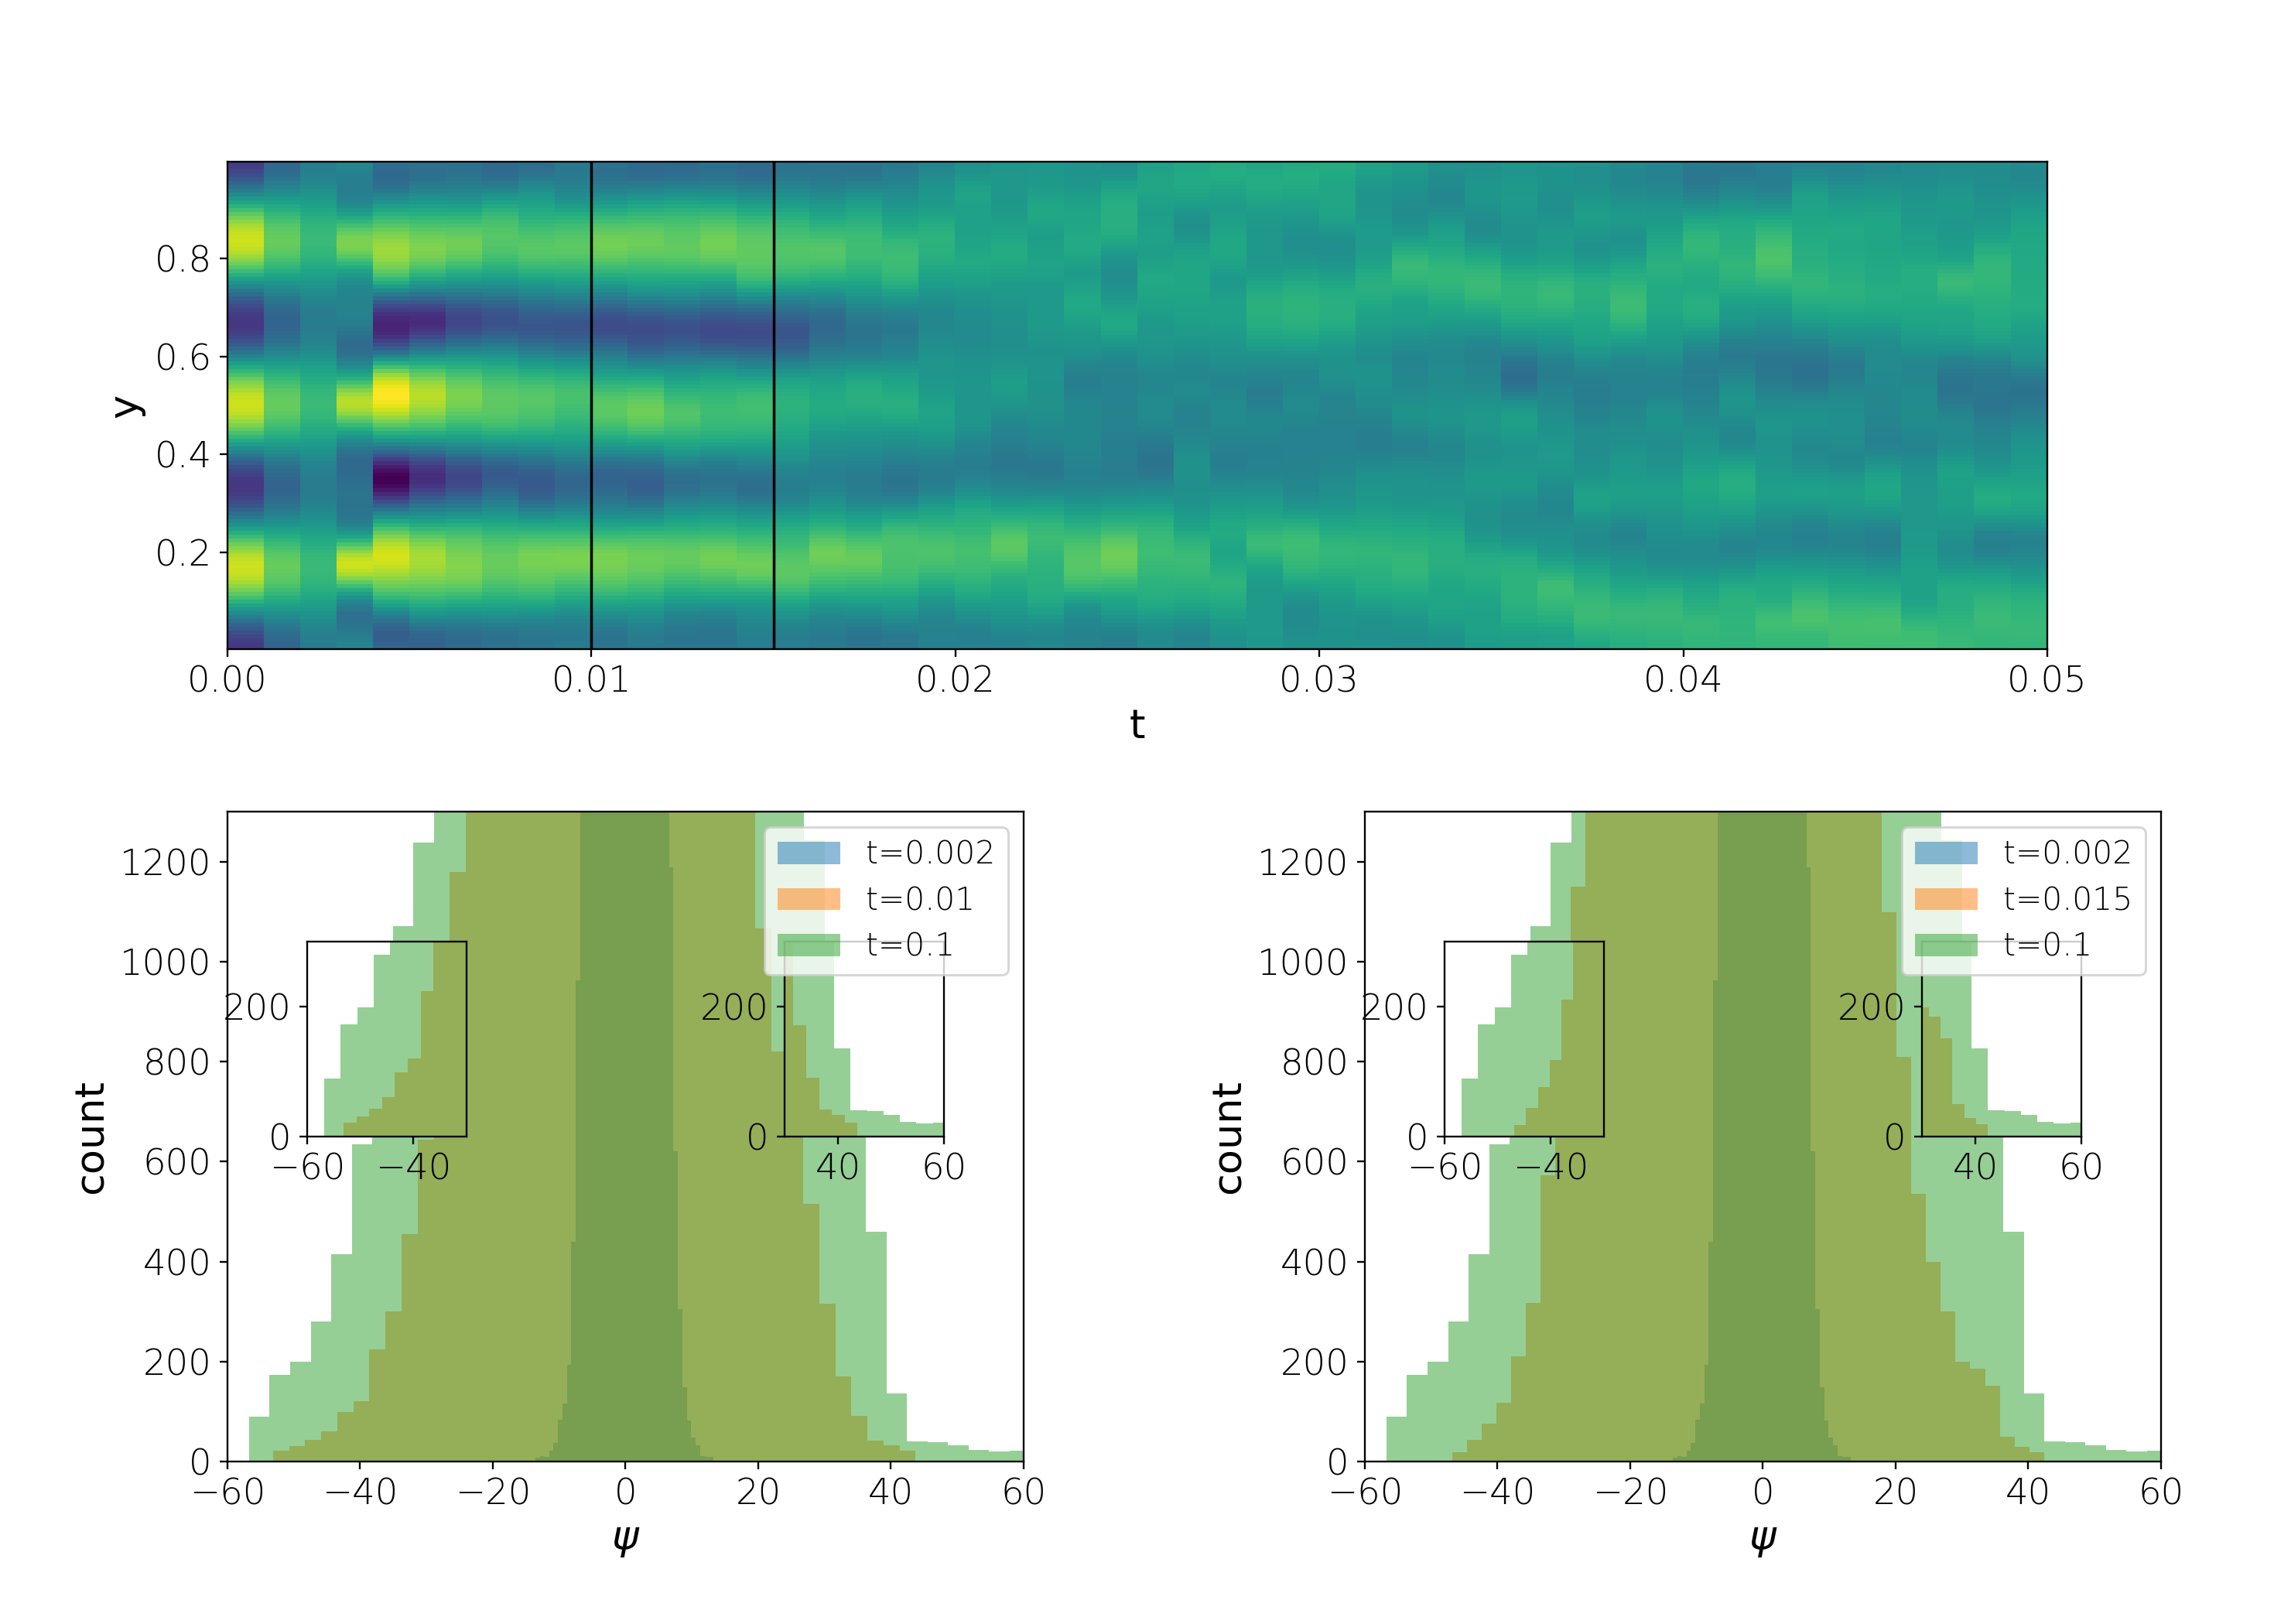

In [12]:
nbins = 40
fig = plt.figure(figsize=(14,10))
ax_top = fig.add_axes([0.1,0.6,0.8,0.3])
ax_top.pcolormesh(df['scales/sim_time'], df['scales/y/1.0'],ux_xavg.T)
ax_top.axvline(0.01, color='k')
ax_top.axvline(0.015, color='k')
ax_top.set_xlabel("t")
ax_top.set_ylabel("y")
ax_top.set_xlim(0,0.05)
#plt.colorbar()
ax_left = fig.add_axes([0.1,0.1,0.35,0.4])
plot_multi_hist(ax_left, df['tasks/psi'], (2,10,-1), ('t=0.002', 't=0.01', 't=0.1'))
ax_right = fig.add_axes([0.6,0.1,0.35,0.4])
plot_multi_hist(ax_right, df['tasks/psi'], (2,15,-1), ('t=0.002', 't=0.015', 't=0.1'))
#plt.tight_layout()